#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

#Exploring Data

In [3]:
df = pd.read_csv('/content/final_raw_sample_0_percent.csv')

In [4]:
df.head()

,Year,Company Name,Country,Industry (Exiobase),Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,% Imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09%,-10.05%,"(5,52,32,974)","(4,85,90,497)","(11,456)","(6,46,758)","(1,51,520)","(2,061)","(3,661)","(58,28,063)","1,042",2%
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,-0.81%,-5.31%,"(5,51,43,250)","(5,07,27,341)","(11,763)","(6,73,791)","(1,57,783)","(2,131)","(3,489)","(35,67,524)",571,0%
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53%,-9.38%,"(5,46,77,862)","(5,34,89,006)","(12,428)","(7,11,263)","(1,66,744)","(2,244)","(3,428)","(2,93,207)",458,1%
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26%,-35.02%,"(4,32,98,590)","(1,89,12,678)","(4,652)","(2,49,594)","(58,535)",(811),"(3,850)","(2,40,69,048)",578,2%
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56%,-4.40%,"(3,08,62,191)","(3,01,89,038)","(7,276)","(4,02,067)","(94,143)","(1,298)","(3,953)","(1,65,542)","1,126",3%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13177 entries, 0 to 13176
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Year                                                           13177 non-null  int64 
 1   Company Name                                                   13177 non-null  object
 2   Country                                                        13177 non-null  object
 3   Industry (Exiobase)                                            13177 non-null  object
 4   Total Environmental Intensity (Revenue)                        13177 non-null  object
 5   Total Environmental Intensity (Operating Income)               12421 non-null  object
 6   Total Environmental Cost                                       13177 non-null  object
 7   Working Capacity                                               1317

In [6]:
df["Country"].nunique()

70

#Pre Processing

In [7]:
europe_countries = [ "Austria","Belgium","Bulgaria","Croatia","Cyprus","Czech Republic","Denmark",
    "Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Latvia","Lithuania",
    "Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain",
    "Sweden"]

df_europe = df[df["Country"].isin(europe_countries)].copy()

In [8]:
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 0 to 13161
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Year                                                           2194 non-null   int64 
 1   Company Name                                                   2194 non-null   object
 2   Country                                                        2194 non-null   object
 3   Industry (Exiobase)                                            2194 non-null   object
 4   Total Environmental Intensity (Revenue)                        2194 non-null   object
 5   Total Environmental Intensity (Operating Income)               2057 non-null   object
 6   Total Environmental Cost                                       2194 non-null   object
 7   Working Capacity                                               2194 non-n

/tmp/ipython-input-3540942886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts1.index, y=country_counts1.values, palette="viridis")


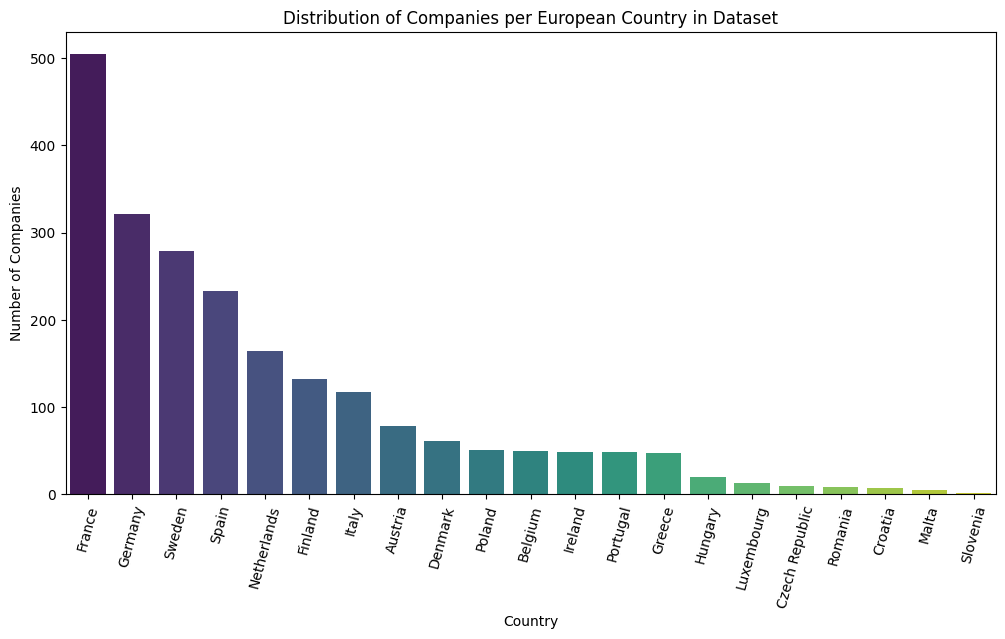

In [9]:
country_counts1 = df_europe["Country"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts1.index, y=country_counts1.values, palette="viridis")
plt.xticks(rotation=75)
plt.xlabel("Country")
plt.ylabel("Number of Companies")
plt.title("Distribution of Companies per European Country in Dataset")
plt.show()

In [10]:
country_counts = df_europe["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="European Countries Covered in Dataset"
)

fig.update_geos(
    visible=False,
    resolution=50,
    scope="europe",
    showcountries=True,
    countrycolor="black"
)

fig.show()

In [11]:
features = [
    "Total Environmental Cost",
    "Working Capacity",
    "Fish Production Capacity",
    "Crop Production Capacity",
    "Meat Production Capacity",
    "Abiotic Resources",
    "Water production capacity (Drinking water & Irrigation Water)"
]

In [40]:
country = df_europe.groupby("Country")[features].mean().reset_index()

map = px.choropleth(country,
                    locations = "Country",
                    locationmode = "country names",
                    color = "Total Environmental Cost",
                    scope = "europe",
                    title = "Average Environment cost by country",
                    color_continuous_scale = "Viridis")

map.update_geos(projection_type = "mollweide")

map.update_geos(
    visible=False,
    resolution=50,
    scope="europe",
    showcountries=True,
    countrycolor="black"
)
map.show()

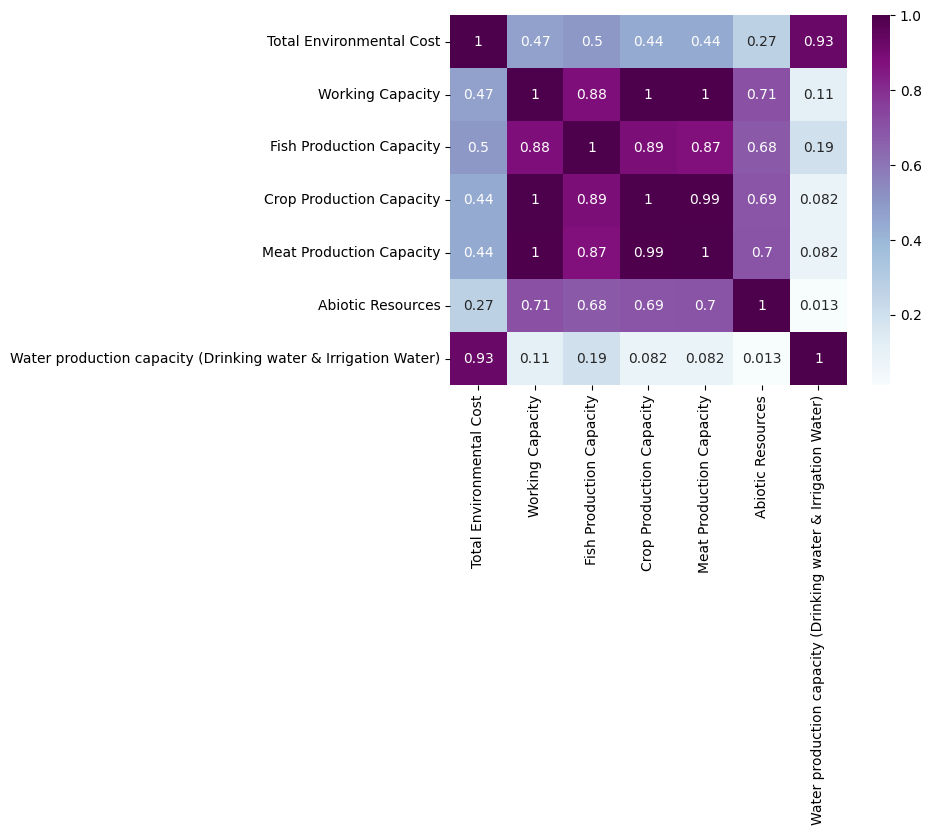

In [39]:
cor = df_europe[features].corr()
sns.heatmap(cor, annot = True, cmap = "BuPu")
plt.show()

In [12]:
def clean_numeric_columns(data, columns):
  for col in columns:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(r"[,\s]", "", regex =True)
        .str.replace("%", "", regex = False)
        .str.replace(r"^\((.*)\)$", r"-\1", regex = True)
    )

    data[col] = pd.to_numeric(data[col], errors = "coerce")
  return data

In [13]:
df_europe.head()

,Year,Company Name,Country,Industry (Exiobase),Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,% Imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09%,-10.05%,"(5,52,32,974)","(4,85,90,497)","(11,456)","(6,46,758)","(1,51,520)","(2,061)","(3,661)","(58,28,063)","1,042",2%
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26%,-35.02%,"(4,32,98,590)","(1,89,12,678)","(4,652)","(2,49,594)","(58,535)",(811),"(3,850)","(2,40,69,048)",578,2%
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56%,-4.40%,"(3,08,62,191)","(3,01,89,038)","(7,276)","(4,02,067)","(94,143)","(1,298)","(3,953)","(1,65,542)","1,126",3%
9,2018,RANDSTAD NV,Netherlands,Activities auxiliary to financial intermediati...,-0.08%,-2.03%,"(2,11,21,606)","(2,00,63,296)","(6,617)","(2,61,507)","(60,285)","(1,064)","(30,725)","(7,04,473)","6,361",15%
13,2018,VIENNA INSURANCE GROUP,Austria,Activities auxiliary to financial intermediati...,-0.10%,-2.98%,"(1,12,54,420)","(1,10,19,670)","(2,731)","(1,38,899)","(32,334)",(472),"(3,913)","(56,846)",446,1%


In [14]:
df_europe = clean_numeric_columns(df_europe, features)

In [15]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_europe[features])

scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X_imputed)

#Implementations

##Dimension Reduction

In [16]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.65671992 0.24243697 0.07625353 0.02333197]


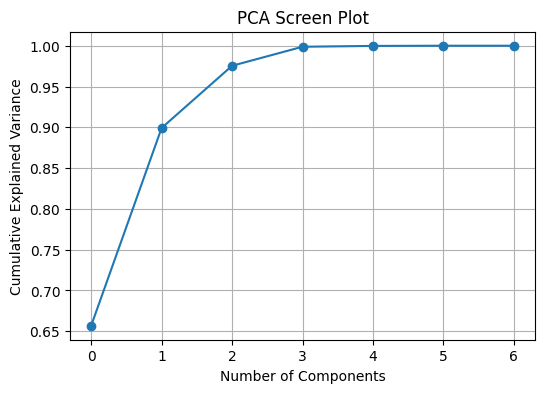

In [17]:
plt.figure(figsize=(6,4))
plt.plot(
    np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_),
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Screen Plot")
plt.grid(True)
plt.show()

##Comparison of different clusetring algorithm

In [18]:
kmeans1 = KMeans(n_clusters=3, random_state=42)
labels_kmeans1 = kmeans1.fit_predict(X_pca)
sil_kmeans1 = silhouette_score(X_pca, labels_kmeans1)

In [19]:
hier = AgglomerativeClustering(n_clusters=3)
labels_hier = hier.fit_predict(X_pca)
sil_hier = silhouette_score(X_pca, labels_hier)

In [20]:
dbscan = DBSCAN(eps=3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)
# For DBSCAN: only compute silhouette if >1 cluster
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    sil_dbscan = silhouette_score(X_pca, labels_dbscan)
else:
    sil_dbscan = "Not applicable (too few clusters or noise)"

In [21]:
print("\nSilhouette Scores:")
print(f"K-means: {sil_kmeans1:.3f}")
print(f"Hierarchical: {sil_hier:.3f}")
print(f"DBSCAN: {sil_dbscan}")


Silhouette Scores:
K-means: 0.958
Hierarchical: 0.900
DBSCAN: Not applicable (too few clusters or noise)


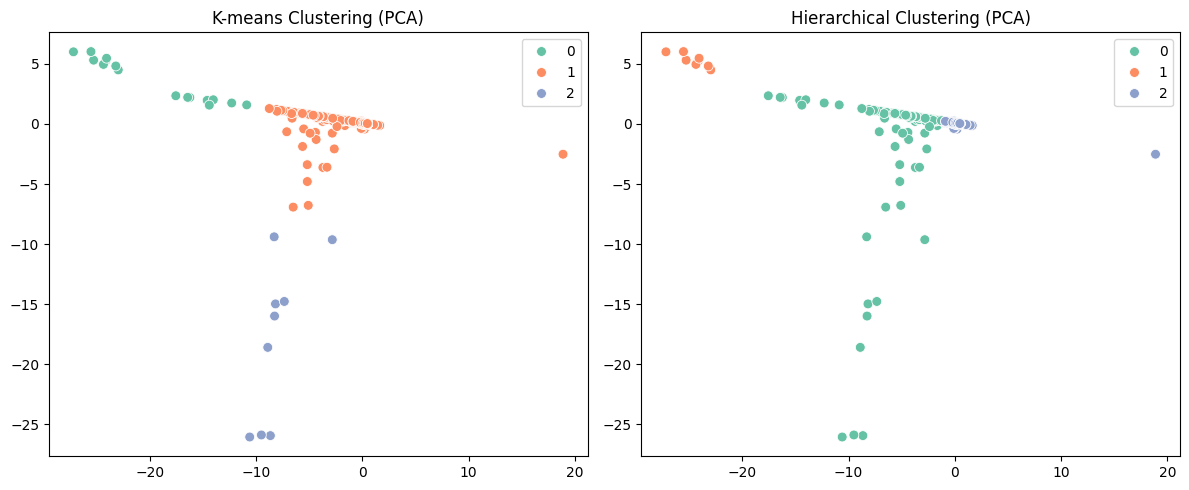

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans1,
                palette="Set2", ax=axes[0], s=50)
axes[0].set_title("K-means Clustering (PCA)")

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_hier,
                palette="Set2", ax=axes[1], s=50)
axes[1].set_title("Hierarchical Clustering (PCA)")

plt.tight_layout()
plt.show()

#Kmeans Implementation

In [23]:
inertias = []
sil_scores = []
k_range = range(2, 10)

In [24]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

##Figuring out the optimal K value

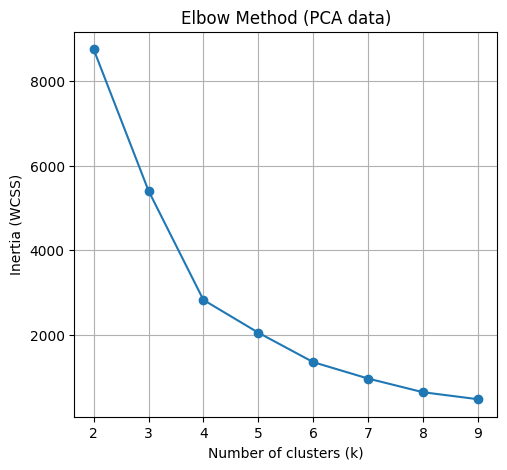

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(list(k_range), inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method (PCA data)")
plt.grid(True)

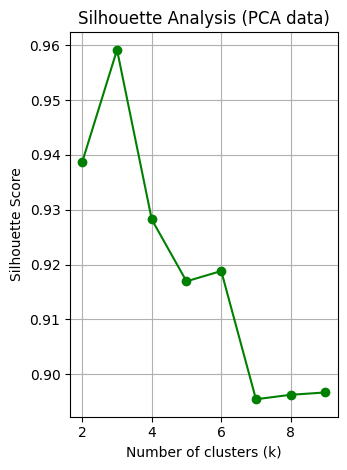

In [26]:
plt.subplot(1,2,2)
plt.plot(list(k_range), sil_scores, marker="o", color="green")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (PCA data)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
best_k = list(k_range)[np.argmax(sil_scores)]
print(f"Best k by silhouette score = {best_k} (score = {max(sil_scores):.3f})")

Best k by silhouette score = 3 (score = 0.959)


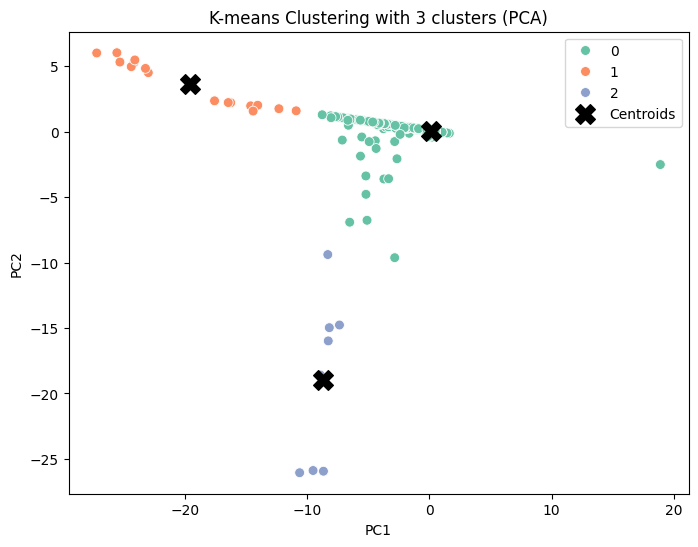

In [28]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_pca)

df_europe["Cluster"] = labels_final

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_final, palette="Set2", s=50)
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-means Clustering with {best_k} clusters (PCA)")
plt.legend()
plt.show()

##Validating the clusters

In [29]:
contingency = pd.crosstab(df_europe["Cluster"], df_europe["Industry (Exiobase)"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 statistic: {chi2:.3f}, p-value: {p:.3f}, dof: {dof}")


Chi2 statistic: 1314.041, p-value: 0.000, dof: 98


In [30]:
groups = [df_europe[df_europe["Cluster"]==c]["Total Environmental Cost"].dropna()
          for c in df_europe["Cluster"].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

F-statistic: 4526.804, p-value: 0.000


##Checking the cluster counts


Number of Companies per Cluster:
Cluster
0    2170
1      16
2       8
Name: count, dtype: int64


/tmp/ipython-input-2842371409.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




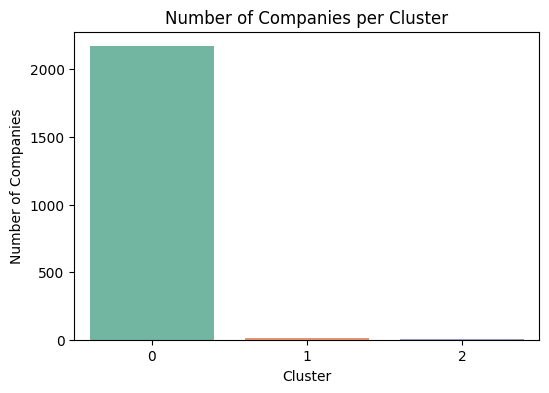

In [31]:
cluster_counts = df_europe["Cluster"].value_counts().sort_index()

print("\nNumber of Companies per Cluster:")
print(cluster_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Number of Companies")
plt.title("Number of Companies per Cluster")
plt.show()

##Getting the Statstical Values of each cluster

In [32]:
cluster0_stats = df_europe[df_europe["Cluster"] == 0][features].agg(
    ["mean", "median", "std"]
)
print("Cluster 0 Statistics:")
print(cluster0_stats)

Cluster 0 Statistics:
        Total Environmental Cost  Working Capacity  Fish Production Capacity  \
mean               -1.252511e+09     -8.746672e+08            -272739.627189   
median             -6.358228e+07     -5.740477e+07             -15377.500000   
std                 5.982432e+09      3.474082e+09             897384.480338   

        Crop Production Capacity  Meat Production Capacity  Abiotic Resources  \
mean               -1.167399e+07             -2.654591e+06      -9.574059e+05   
median             -7.583610e+05             -1.732860e+05      -1.016900e+04   
std                 4.550919e+07              1.052961e+07       1.028514e+07   

        Water production capacity (Drinking water & Irrigation Water)  
mean                                        -3.623038e+08              
median                                      -2.025752e+06              
std                                          4.231926e+09              


In [33]:
cluster1_stats = df_europe[df_europe["Cluster"] == 1][features].agg(
    ["mean", "median", "std"]
)
print("Cluster 1 Statistics:")
print(cluster1_stats)

Cluster 1 Statistics:
        Total Environmental Cost  Working Capacity  Fish Production Capacity  \
mean               -5.723603e+10     -5.300127e+10             -1.326822e+07   
median             -6.089540e+10     -5.741357e+10             -1.374532e+07   
std                 1.216020e+10      9.883089e+09              2.001347e+06   

        Crop Production Capacity  Meat Production Capacity  Abiotic Resources  \
mean               -6.541172e+08             -1.535942e+08      -2.186659e+09   
median             -6.947660e+08             -1.629900e+08      -2.936331e+09   
std                 1.095712e+08              2.571771e+07       1.830201e+09   

        Water production capacity (Drinking water & Irrigation Water)  
mean                                        -1.635192e+09              
median                                      -1.079041e+09              
std                                          1.745126e+09              


In [34]:
cluster2_stats = df_europe[df_europe["Cluster"] == 2][features].agg(
    ["mean", "median", "std"]
)
print("Cluster 2 Statistics:")
print(cluster2_stats)

Cluster 2 Statistics:
        Total Environmental Cost  Working Capacity  Fish Production Capacity  \
mean               -2.262524e+11     -9.592719e+09             -4.154519e+06   
median             -2.106076e+11     -1.080415e+10             -3.675858e+06   
std                 6.491713e+10      4.716225e+09              1.196813e+06   

        Crop Production Capacity  Meat Production Capacity  Abiotic Resources  \
mean               -8.844704e+07             -2.065978e+07      -2.561897e+07   
median             -1.086188e+08             -2.543424e+07      -2.138122e+07   
std                 7.233505e+07              1.724099e+07       7.564065e+06   

        Water production capacity (Drinking water & Irrigation Water)  
mean                                        -2.165267e+11              
median                                      -1.986077e+11              
std                                          6.864239e+10              


##Further exploration for analysis purpose

In [35]:
industries_per_cluster = (
    df_europe.groupby('Cluster')['Industry (Exiobase)']
      .unique()
)

for cluster_id, industries in industries_per_cluster.items():
    print(f"\nCluster {cluster_id}:")
    for ind in industries:
        print("  -", ind)


Cluster 0:
  - Activities auxiliary to financial intermediation (67)
  - Activities of membership organisation n.e.c. (91)
  - Air transport (62)
  - Chemicals nec
  - Computer and related activities (72)
  - Construction (45)
  - Extraction of crude petroleum and services related to crude oil extraction,excluding surveying
  - Extraction of natural gas and services related to natural gas extraction,excluding surveying
  - Financial intermediation,except insurance and pension funding (65)
  - Health and social work (85)
  - Insurance and pension funding,except compulsory social security (66)
  - Manufacture of beverages
  - Manufacture of electrical machinery and apparatus n.e.c. (31)
  - Manufacture of fabricated metal products,except machinery and equipment (28)
  - Manufacture of furniture; manufacturing n.e.c. (36)
  - Manufacture of machinery and equipment n.e.c. (29)
  - Manufacture of medical,precision and optical instruments,watches and clocks (33)
  - Manufacture of motor veh

In [36]:
industry_counts = (
    df_europe.groupby(['Cluster', 'Industry (Exiobase)'])
      .size()
      .reset_index(name='count')
      .sort_values(['Cluster','count'], ascending=[True, False])
)
print(industry_counts)

    Cluster                                Industry (Exiobase)  count
9         0  Financial intermediation,except insurance and ...    239
5         0                                  Construction (45)    188
33        0                   Post and telecommunications (64)    125
38        0                      Production of electricity nec     98
30        0                      Other service activities (93)     94
45        0  Retail trade,except of motor vehicles and moto...     92
7         0  Extraction of crude petroleum and services rel...     88
17        0  Manufacture of machinery and equipment n.e.c. ...     85
15        0  Manufacture of fabricated metal products,excep...     84
41        0                        Real estate activities (70)     82
4         0               Computer and related activities (72)     74
19        0  Manufacture of motor vehicles,trailers and sem...     73
40        0                         Quarrying of sand and clay     61
42        0  Recreat

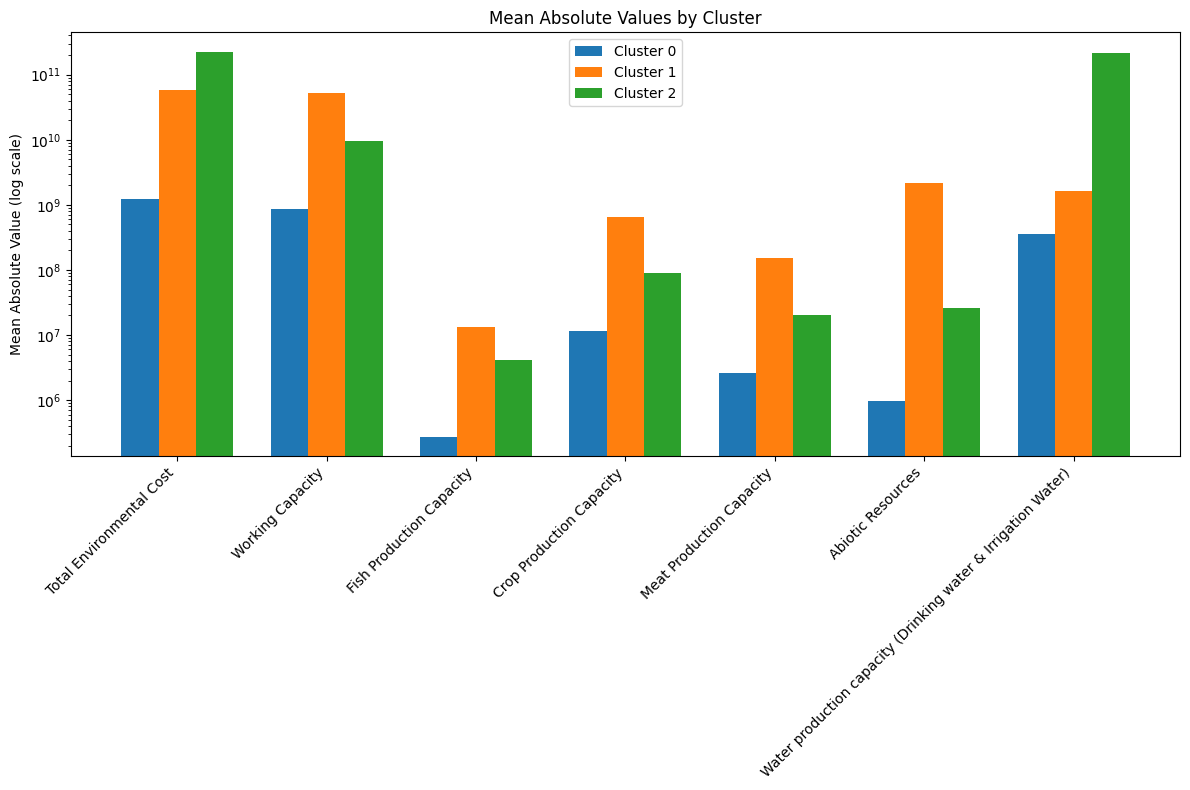

In [37]:
cluster_means = (
    df_europe
    .groupby('Cluster')[features]
    .mean()
    .abs()
)

cluster_means = cluster_means.sort_index()

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(features))
width = 0.25

for i, cluster_id in enumerate(cluster_means.index):
    ax.bar(
        x + (i - 1) * width,
        cluster_means.loc[cluster_id],
        width,
        label=f'Cluster {cluster_id}'
    )

ax.set_ylabel('Mean Absolute Value (log scale)')
ax.set_title('Mean Absolute Values by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()